<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Python BootCamp </h1>
        <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS) <br/>
         September 2022, Paris | © Saeed VARASTEH [RP] | Lucas VILLAIN
    </span>
</div>

### Lecture 09: Data Exploration with Pandas

The first step after reading in the data, is to take a look around, familiarize yourself and get acquainted with the data. We do this by partaking in a little data exploration to get a feel for things.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

In [3]:
# Pandas Options
pd.set_option('display.max_columns', 15)
pd.set_option("display.max_rows", 5)

---

<div style='color:gray; font-size:16pt;'> 
Loading Data into Pandas
</div>

#### Read Data

In [4]:
data = pd.read_csv('adult.csv', na_values="?")
print( data.shape )

(48842, 15)


In [5]:
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


---

<div style='color:gray; font-size:16pt;'> 
Data Cleaning
</div>

__Drop Columns__

Let's start by dropping columns, which we won't be using.

In [1]:
data1 = data.drop(columns=["fnlwgt","education","relationship","capital-loss"])

NameError: name 'data' is not defined

In [ ]:
print( data.shape )
data.head(5)

__Dealing with NaNs:__

In [62]:
data.isna().sum()

age                  0
workclass         2799
                  ... 
native-country     857
income               0
Length: 11, dtype: int64

In [63]:
data.isnull().sum()

age                  0
workclass         2799
                  ... 
native-country     857
income               0
Length: 11, dtype: int64

In [64]:
data.dropna(inplace=True)

In [65]:
print( data.shape )
data.head(5)

(45222, 11)


,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,30,United-States,<=50K


__Rename Columns__

In [66]:
data.rename(columns={
        'capital-gain': 'capital', 
        'hours-per-week': 'workinghours'
    },
    inplace=True
)
data.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,30,United-States,<=50K


In [67]:
data.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'race', 'gender', 'capital', 'workinghours', 'native-country',
       'income'],
      dtype='object')

__Type Conversion__

Notice anything off with the data types?

In [68]:
data.dtypes

age                int64
workclass         object
                   ...  
native-country    object
income            object
Length: 11, dtype: object

Lets fix column type:

In [69]:
data['workclass'] = data.workclass.astype('category')
data.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,30,United-States,<=50K


__Creating New Column__

In [70]:
data['above_mean_hours'] = data.workinghours > data.workinghours.mean()
data.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,40,United-States,<=50K,False
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,50,United-States,<=50K,True
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,40,United-States,>50K,False
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,40,United-States,>50K,False
5,34,Private,6,Never-married,Other-service,White,Male,0,30,United-States,<=50K,False


Using `assign` function:

In [71]:
data.assign(above_mean_hours=lambda x: x.workinghours > x.workinghours.mean())
data.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,40,United-States,<=50K,False
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,50,United-States,<=50K,True
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,40,United-States,>50K,False
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,40,United-States,>50K,False
5,34,Private,6,Never-married,Other-service,White,Male,0,30,United-States,<=50K,False


<div class="alert-info"> 
    <b>lambda</b> functions: These small, anonymous functions can receive multiple arguments, but can only contain one expression (the return value).
</div>

#### Filtering Data

In [72]:
data.loc[(data['native-country'] == 'United-States') & (data['age'] >=30) & (data['age'] <= 60)]

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,50,United-States,<=50K,True
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,40,United-States,>50K,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48839,58,Private,9,Widowed,Adm-clerical,White,Female,0,40,United-States,<=50K,False
48841,52,Self-emp-inc,9,Married-civ-spouse,Exec-managerial,White,Female,15024,40,United-States,>50K,False


In [73]:
data.loc[~data['marital-status'].str.contains('married|Married')]

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours
18,37,Private,9,Widowed,Machine-op-inspct,White,Female,0,20,United-States,<=50K,False
27,23,Private,9,Separated,Machine-op-inspct,Black,Male,0,54,United-States,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...
48830,43,State-gov,10,Divorced,Adm-clerical,White,Female,0,40,United-States,<=50K,False
48839,58,Private,9,Widowed,Adm-clerical,White,Female,0,40,United-States,<=50K,False


#### Conditional change

In [74]:
data['gender'].value_counts()

Male      30527
Female    14695
Name: gender, dtype: int64

In [75]:
# Change 'Female' category of 'gender' to 'F' ----- Inplace
data.loc[ data['gender'] == 'Female','gender' ] = 'F'

In [76]:
data.loc[ data['gender'] == 'Male','gender' ] = 'M'

In [77]:
data.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours
0,25,Private,7,Never-married,Machine-op-inspct,Black,M,0,40,United-States,<=50K,False
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,M,0,50,United-States,<=50K,True
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,M,0,40,United-States,>50K,False
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,M,7688,40,United-States,>50K,False
5,34,Private,6,Never-married,Other-service,White,M,0,30,United-States,<=50K,False


#### Sorting values

In [78]:
data.sort_values(['age', 'educational-num'],ascending=[1,0])

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours
14993,17,Private,10,Never-married,Adm-clerical,White,F,0,6,United-States,<=50K,False
23169,17,Private,10,Never-married,Adm-clerical,White,M,0,20,United-States,<=50K,False
...,...,...,...,...,...,...,...,...,...,...,...,...
36028,90,Private,4,Married-civ-spouse,Machine-op-inspct,White,M,0,40,United-States,<=50K,False
48648,90,Local-gov,4,Married-civ-spouse,Protective-serv,White,M,2653,40,United-States,<=50K,False


__Encodings__

__sklearn__ `LabelEncoder`

In [79]:
data.race.value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
race_encoder = LabelEncoder()
data['race'] = race_encoder.fit_transform( data['race'] )

In [81]:
data.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours
0,25,Private,7,Never-married,Machine-op-inspct,2,M,0,40,United-States,<=50K,False
1,38,Private,9,Married-civ-spouse,Farming-fishing,4,M,0,50,United-States,<=50K,True
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,4,M,0,40,United-States,>50K,False
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,2,M,7688,40,United-States,>50K,False
5,34,Private,6,Never-married,Other-service,4,M,0,30,United-States,<=50K,False


In [82]:
data.race.value_counts()

4    38903
2     4228
1     1303
0      435
3      353
Name: race, dtype: int64

In [83]:
print( {k: v for k, v in enumerate(list(race_encoder.classes_))} )

{0: 'Amer-Indian-Eskimo', 1: 'Asian-Pac-Islander', 2: 'Black', 3: 'Other', 4: 'White'}


__pandas__ One Hot Encoder

In [84]:
data_encoder = pd.get_dummies(data, columns=["race"])
print( data_encoder.shape )
data_encoder.head()

(45222, 16)


,age,workclass,educational-num,marital-status,occupation,gender,capital,...,income,above_mean_hours,race_0,race_1,race_2,race_3,race_4
0,25,Private,7,Never-married,Machine-op-inspct,M,0,...,<=50K,False,0,0,1,0,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,M,0,...,<=50K,True,0,0,0,0,1
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,M,0,...,>50K,False,0,0,0,0,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,M,7688,...,>50K,False,0,0,1,0,0
5,34,Private,6,Never-married,Other-service,M,0,...,<=50K,False,0,0,0,0,1


#### Discretization

Use the `pd.cut()` function to create values bins of equal width:

In [85]:
pd.cut(data["educational-num"], bins=3, labels=['low', 'medium', 'high'])



0        medium
1        medium
          ...  
48840    medium
48841    medium
Name: educational-num, Length: 45222, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [86]:
pd.cut(data["age"], bins = 3, labels = ['young', 'mid-age', 'old'])
data.head(20)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours
0,25,Private,7,Never-married,Machine-op-inspct,2,M,0,40,United-States,<=50K,False
1,38,Private,9,Married-civ-spouse,Farming-fishing,4,M,0,50,United-States,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...
23,25,Private,13,Never-married,Prof-specialty,4,M,0,43,Peru,<=50K,True
24,25,Private,13,Married-civ-spouse,Prof-specialty,4,M,0,40,United-States,<=50K,False


---

<div style='color:gray; font-size:16pt;'> 
Data Exploration
</div>

#### Count total data per country

In [87]:
data["native-country"].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [88]:
data["native-country"].value_counts()

United-States         41292
Mexico                  903
                      ...  
Hungary                  18
Holand-Netherlands        1
Name: native-country, Length: 41, dtype: int64

In [89]:
data.groupby("native-country").count()['age']

native-country
Cambodia       26
Canada        163
             ... 
Vietnam        83
Yugoslavia     23
Name: age, Length: 41, dtype: int64

In [90]:
data['count'] = 1
data.groupby("native-country").count()['count']

#or 

# data.groupby("native-country").sum()['count']

native-country
Cambodia       26
Canada        163
             ... 
Vietnam        83
Yugoslavia     23
Name: count, Length: 41, dtype: int64

#### Highest capital per country

In [91]:
data.groupby('native-country')['native-country','capital'].max()

C:\Users\ayu4\AppData\Local\Temp\ipykernel_4288\950783275.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('native-country')['native-country','capital'].max()


,native-country,capital
native-country,,
Cambodia,Cambodia,13550
Canada,Canada,99999
...,...,...
Vietnam,Vietnam,15024
Yugoslavia,Yugoslavia,7688


#### Pivot Table

A pivot table is a table of grouped values that aggregates the individual items of a more extensive table within one or more discrete categories. 

In [92]:
data.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours,count
0,25,Private,7,Never-married,Machine-op-inspct,2,M,0,40,United-States,<=50K,False,1
1,38,Private,9,Married-civ-spouse,Farming-fishing,4,M,0,50,United-States,<=50K,True,1
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,4,M,0,40,United-States,>50K,False,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,2,M,7688,40,United-States,>50K,False,1
5,34,Private,6,Never-married,Other-service,4,M,0,30,United-States,<=50K,False,1


In [93]:
#i want to have the average age for each working class 

data["age"].mean()

38.547941267524656

In [94]:
data.groupby("workclass")["age"].mean()

#or 

data.groupby("workclass")["age"].max()

workclass
Federal-gov    90
Local-gov      90
               ..
State-gov      81
Without-pay    74
Name: age, Length: 7, dtype: int64

We can build a pivot table to compare educational-num across the gender in our dataset:

In [95]:
#double grouping
# a group over a group and then apply your function

In [96]:
#for each educational number, for each gender, counts the number of rows

data.pivot_table(index='educational-num', columns='gender', values='count', aggfunc='sum')

gender,F,M
educational-num,,
1,20,52
2,56,166
...,...,...
15,124,661
16,108,436


In [97]:
pd.crosstab(index=data["workclass"], columns=data["gender"])

gender,F,M
workclass,,
Federal-gov,445,961
Local-gov,1244,1856
...,...,...
State-gov,755,1191
Without-pay,7,14


In [98]:
#groupby, pivot_table, crosstab

#### Crosstabs

The `pd.crosstab()` function provides an easy way to create a frequency table.

In [99]:
pd.crosstab(index=data["educational-num"],columns=data["gender"])

gender,F,M
educational-num,,
1,20,52
2,56,166
...,...,...
15,124,661
16,108,436


#### Describe

In [100]:
data.describe()

,age,educational-num,race,capital,workinghours,count
count,45222.000000,45222.00000,45222.000000,45222.000000,45222.000000,45222.0
mean,38.547941,10.11846,3.680288,1101.430344,40.938017,1.0
...,...,...,...,...,...,...
75%,47.000000,13.00000,4.000000,0.000000,45.000000,1.0
max,90.000000,16.00000,4.000000,99999.000000,99.000000,1.0


---

<div style='color:gray; font-size:16pt;'> 
Data Visualization
</div>

In this section, we will learn how to visualize data using pandas along with the Matplotlib and Seaborn libraries for additional features. We will create a variety of visualizations that will help us better understand our data.

Before everthing, to embed SVG-format plots in the notebook, we will also call the `%config` and `%matplotlib inline` magics:

In [101]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

#just to have better quality figures in 

In [102]:
data.head(5)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital,workinghours,native-country,income,above_mean_hours,count
0,25,Private,7,Never-married,Machine-op-inspct,2,M,0,40,United-States,<=50K,False,1
1,38,Private,9,Married-civ-spouse,Farming-fishing,4,M,0,50,United-States,<=50K,True,1
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,4,M,0,40,United-States,>50K,False,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,2,M,7688,40,United-States,>50K,False,1
5,34,Private,6,Never-married,Other-service,4,M,0,30,United-States,<=50K,False,1


Text(0.5, 1.0, 'Ages')

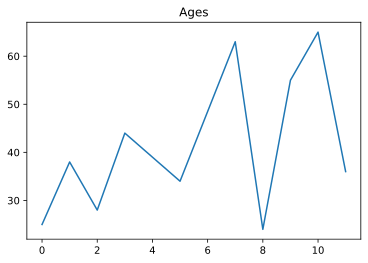

In [128]:
#method1
fig, ax = plt.subplots( nrows=1, ncols=1)
values = data.iloc[:10, 0]
ax.plot(values)
ax.set_title("Ages")

Text(0.5, 1.0, 'Ages')

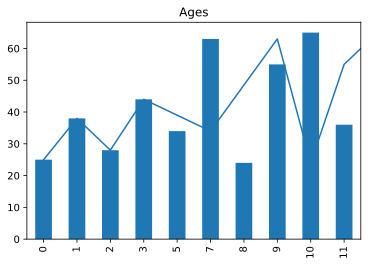

In [124]:
#method2 use plot function from the dataframe
data.iloc[:10, 0].plot(kind="line")  #(kind = bar or hist)

#method3 

ax = data.iloc[:10,0].plot.bar()
ax.set_title("Ages")

#### Plotting with Pandas

We can create a variety of visualizations using the `plot()` method.

__Line Plot__

<div class="alert-info">
The plot() method returns an Axes object that can be modified further (e.g., to add reference lines, annotations, labels, etc.).
</div>

In [127]:
data.loc['educational-num',"age"].plot(title='Ages 0:10', ylabel='Age', alpha=0.8)

KeyError: 'educational-num'

__Bar Plot__

For our next example, we will plot vertical bars to compare income throughput versus marital status. Let's start by creating a pivot table with the information we need

In [106]:
plot_data = data.pivot_table(index='marital-status', columns='income', values='count', aggfunc='sum')
plot_data.head()

income,<=50K,>50K
marital-status,,
Divorced,5642,655
Married-AF-spouse,18,14
Married-civ-spouse,11491,9564
Married-spouse-absent,498,54
Never-married,13897,701


Pandas offers other plot types via the `kind` parameter, so we specify `kind='bar`' when calling the `plot()` method. Then, we further format the visualization using the `Axes` object returned by the `plot()` method:

<AxesSubplot:xlabel='martial status'>

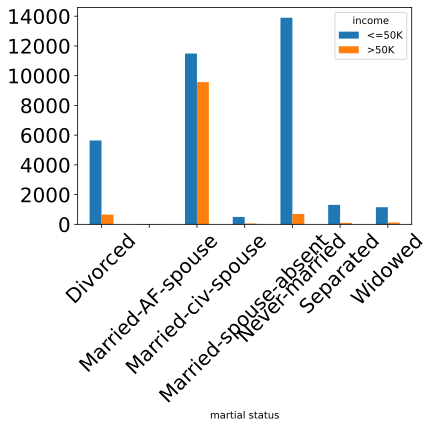

In [107]:
plot_data.plot(kind="bar", rot=45, xlabel = "martial status", fontsize = 20)

In [108]:
ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='adults', fontsize=8,
    figsize=(12, 1.5), title='Income by Marital Status'


# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3, frameon=False)

SyntaxError: invalid syntax (3596850490.py, line 7)

__Plotting distributions__

Let's now compare the distribution of age across income levels. We will create two subplots for each income level with both a histogram and a kernel density estimate (KDE) of the distribution. 

Pandas has generated the `Figure` and `Axes` objects for both examples so far, but we can build custom layouts by creating them ourselves with Matplotlib using the `plt.subplots()` function.

While pandas lets us specify that we want subplots and their layout (with the `subplots` and `layout` parameters, respectively), using Matplotlib to create the subplots directly gives us additional flexibility:

In [109]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6, 4))

plot_data = data[data['income'] == '<=50k'].age
plot_data.plot[kind= 'hist', legend=False, ax=axes[0]]
axes[0].set(title=f'<=50k Age Distribution', xlabel='Age')



for income, ax in zip(data.income.unique(), axes):
    plot_data = data[ data['income'] == income ].age
    plot_data.plot(kind='hist', legend=False, density=True, alpha=0.8, ax=ax)
    plot_data.plot(kind='kde', legend=False, color='blue', ax=ax)
    ax.set(title=f'{income} Age Distributions', xlabel='Age')

fig.tight_layout() # handle overlaps

SyntaxError: invalid syntax (2725611443.py, line 4)

In [110]:
#note on zip function 

list1 = [1, 2, 3]
list2 = ["A", "B", "C", "D"]



In [111]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

If you're new to the `zip()` function, check out [this article](https://realpython.com/python-zip-function/).

__Plotting with Seaborn__

In [112]:
import seaborn as sns

The __Seaborn__ library provides the means to easily visualize long-format data without first pivoting it. In addition, it also offers some additional plot types – once again building on top of Mtplotlib.

With Seaborn, we can specify plot colors according to values of a column with the `hue` parameter. When working with functions that generate subplots, we can also specify how to split the subplots by values of a long-format column with the `col` and `row` parameters. Lets revisit the above plot using seaborn:

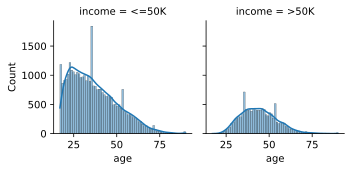

In [113]:
sns.displot( data=data, x='age', col='income', kde=True, height=2.5 )

C:\Users\ayu4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


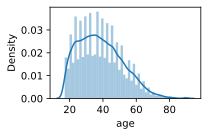

In [114]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3, 2))
sns.distplot(data["age"], ax=ax)
plt.tight_layout()

__Heatmaps__

We can also use Seaborn to visualize pivot tables as heatmaps:

In [115]:
plot_data = data.pivot_table(index='marital-status', columns='income', values='count', aggfunc='sum')
plot_data.head()

income,<=50K,>50K
marital-status,,
Divorced,5642,655
Married-AF-spouse,18,14
Married-civ-spouse,11491,9564
Married-spouse-absent,498,54
Never-married,13897,701


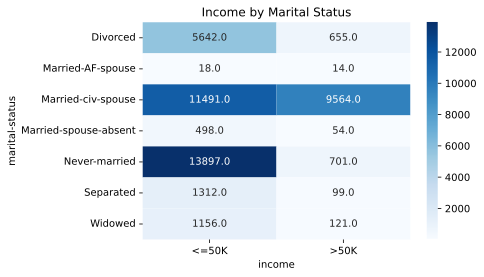

In [116]:
ax = sns.heatmap(data=plot_data, cmap='Blues', annot=True, fmt='.1f')
_ = ax.set_title('Income by Marital Status')

__Box Plot__

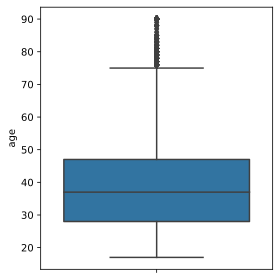

In [117]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 4))
sns.boxplot(y="age", data=data, ax=ax)
plt.tight_layout()

__Correlation Plot__

<AxesSubplot:>

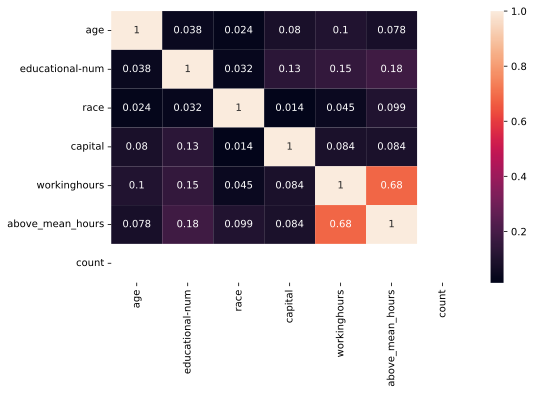

In [118]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr().abs(),  annot=True)

---

<div class="alert-info" style="background-color:#ece4f5; padding-bottom:22px; background-image:url(images/arrows.png); background-repeat:no-repeat; background-position: right; background-size: contain;">
    <img src="images/assignment.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#8966b0;">
        <h4 style="padding-top:25px;"> EXERCISES 06 - PART ONE and TWO </h4>
    </span>
</div>

<div class="alert-info" style="background-color:#fff4e3; padding-bottom:22px; background-image:url(images/arrows.png); background-repeat:no-repeat; background-position: right; background-size: contain;">
    <img src="images/homework.png" style="height:60px; float:left; padding-right:10px; padding-left:7px;" />
    <span style="font-weight:bold; color:#db9425;">
        <h4 style="padding-top:25px;"> HOMEWORK 07 </h4>
    </span>
</div>

---

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#f0ffff;">
    <img src="images/self.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#1a8a8a">
        <h4 style="padding-top:25px;"> SELF-STUDY </h4>
    </span>
</div>

## Summary:

### Create Test Objects

| Operator | Description |
|:---- |:---- |
| **`pd.DataFrame(np.random.rand(20,5))`** | **5 columns and 20 rows of random floats** | 
| **`pd.Series(my_list)`** | **Create a series from an iterable my_list** | 
| **`df.index = pd.date_range('1900/1/30', periods=df.shape[0])`** | **Add a date index** | 

### Viewing/Inspecting Data

| Operator | Description |
|:---- |:---- |
| **`df.head(n)`** | **First n rows of the DataFrame** | 
| **`df.tail(n)`** | **Last n rows of the DataFrame** | 
| **`df.shape`** | **Number of rows and columns** | 
| **`df.info()`** | **Index, Datatype and Memory information** | 
| **`df.describe()`** | **Summary statistics for numerical columns** | 
| **`s.value_counts(dropna=False)`** | **View unique values and counts** | 
| **`df.apply(pd.Series.value_counts)`** | **Unique values and counts for all columns** | 

### Selection

| Operator | Description |
|:---- |:---- |
| **`df[col]`** | **Returns column with label col as Series** | 
| **`df[[col1, col2]]`** | **Returns columns as a new DataFrame** | 
| **`s.iloc[0]`** | **Selection by position** | 
| **`s.loc['index_one']`** | **Selection by index** | 
| **`df.iloc[0,:]`** | **First row** | 
| **`df.iloc[0,0]`** | **First element of first column** | 

### Data Cleaning

| Operator | Description |
|:---- |:---- |
| **`df.columns = ['a','b','c']`** | **Rename columns** | 
| **`pd.isnull()`** | **Checks for null Values, Returns Boolean Arrray** | 
| **`pd.notnull()`** | **Opposite of pd.isnull()** | 
| **`df.dropna()`** | **Drop all rows that contain null values** | 
| **`df.dropna(axis=1)`** | **Drop all columns that contain null values** | 
| **`df.dropna(axis=1,thresh=n)`** | **Drop all rows have have less than n non null values** | 
| **`df.fillna(x)`** | **Replace all null values with x** | 
| **`s.fillna(s.mean())`** | **Replace all null values with the mean** | 
| **`s.astype(float)`** | **Convert the datatype of the series to float** | 
| **`s.replace(1,'one')`** | **Replace all values equal to 1 with 'one'** | 
| **`s.replace([2,3],['two', 'three'])`** | **Replace all 2 with 'two' and 3 with 'three'** | 
| **`df.rename(columns=lambda x: x + 1)`** | **Mass renaming of columns** | 
| **`df.rename(columns={'old_name': 'new_ name'})`** | **Selective renaming** | 
| **`df.set_index('column_one')`** | **Change the index** | 
| **`df.rename(index=lambda x: x + 1)`** | **Mass renaming of index** | 

### Filter, Sort, and Groupby

| Operator | Description |
|:---- |:---- |
| **`df[df[col] > 0.6]`** | **Rows where the column col is greater than 0.6** | 
| **`df[(df[col] > 0.6) & (df[col] < 0.8)]`** | **Rows where 0.8 > col > 0.6** | 
| **`df.sort_values(col1)`** | **Sort values by col1 in ascending order** | 
| **`df.sort_values(col2,ascending=False)`** | **Sort values by col2 in descending order.5** | 
| **`df.sort_values([col1,col2],ascending=[True,False])`** | **Sort values by col1 in ascending order then col2 in descending order** | 
| **`df.groupby(col)`** | **Returns a groupby object for values from one column** | 
| **`df.groupby([col1,col2])`** | **Returns groupby object for values from multiple columns** | 
| **`df.groupby(col1)[col2]`** | **Returns the mean of the values in col2, grouped by the values in col1** | 
| **`df.pivot_table(index=col1,values=[col2,col3],aggfunc=mean)`** | **Create a pivot table that groups by col1 and calculates the mean of col2 and col3** | 
| **`df.groupby(col1).agg(np.mean)`** | **Find the average across all columns for every unique col1 group** | 
| **`df.apply(np.mean)`** | **Apply the function np.mean() across each column** | 
| **`nf.apply(np.max,axis=1)`** | **Apply the function np.max() across each row** | 

### Join/Combine

| Operator | Description |
|:---- |:---- |
| **`df1.append(df2)`** | **Add the rows in df1 to the end of df2 (columns should be identical)** | 
| **`pd.concat([df1, df2],axis=1)`** | **Add the columns in df1 to the end of df2 (rows should be identical)** | 
| **`df1.join(df2,on=col1, how='inner')`** | **SQL-style join the columns in df1 with the columns on df2 where the rows for col have identical values. The 'how' can be 'left', 'right', 'outer' or 'inner'** | 

### Statistics

| Operator | Description |
|:---- |:---- |
| **`df.describe()`** | **Summary statistics for numerical columns** | 
| **`df.mean()`** | **Returns the mean of all columns** | 
| **`df.corr()`** | **Returns the correlation between columns in a DataFrame** | 
| **`df.count()`** | **Returns the number of non-null values in each DataFrame column** | 
| **`df.max()`** | **Returns the highest value in each column** | 
| **`df.min()`** | **Returns the lowest value in each column** | 
| **`df.median()`** | **Returns the median of each column** | 
| **`df.std()`** | **Returns the standard deviation of each column** |

### Importing Data

| Operator | Description |
|:---- |:---- |
| **`pd.read_csv(filename)`** | **From a CSV file** | 
| **`pd.read_table(filename)`** | **From a delimited text file (like TSV)** | 
| **`pd.read_excel(filename)`** | **From an Excel file** | 
| **`pd.read_sql(query, connection_object)`** | **Read from a SQL table/database** | 
| **`pd.read_json(json_string)`** | **Read from a JSON formatted string, URL or file.** | 
| **`pd.read_html(url)`** | **Parses an html URL, string or file and extracts tables to a list of dataframes** | 
| **`pd.read_clipboard()`** | **Takes the contents of your clipboard and passes it to read_table()** | 
| **`pd.DataFrame(dict)`** | **From a dict, keys for columns names, values for data as lists** |

### Exporting Data

| Operator | Description |
|:---- |:---- |
| **`df.to_csv(filename)`** | **Write to a CSV file** | 
| **`df.to_excel(filename)`** | **Write to an Excel file** | 
| **`df.to_sql(table_name, connection_object)`** | **Write to a SQL table** | 
| **`df.to_json(filename)`** | **Write to a file in JSON format** |

---